<a href="https://colab.research.google.com/github/LiveKlas/DataScience_Projects/blob/main/notebooks/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# delimeter

# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)




In [ ]:
# Loading the data into the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/LiveKlas/DataScience_Projects/main/Data/cars_data.csv')

df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [ ]:
# dropping columns

df = df.drop(['Engine Fuel Type',
              'Market Category',
              'Vehicle Style',
              'Popularity',
              'Vehicle Size',
              'Number of Doors'
              ], axis=1)

In [ ]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
highway MPG,int64
city mpg,int64
MSRP,int64


In [ ]:
# Renaming the columns

# This is a good approach it improves the readability of the dataset.

df = df.rename(columns={"Engine HP": "HP",
                        "Engine Cylinders": "Cylinders",
                        "Transmission Type": "Transmission",
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H",
                        "city mpg": "MPG-C",
                        "MSRP": "Price"
                        })

df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(11914, 10)

In [ ]:
df[df.duplicated()]

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,26,22,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,29,20,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,30,23,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,22,15,29149


In [ ]:
# dropping duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)



number of duplicate rows:  (989, 10)


In [ ]:
duplicate_rows_df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,26,22,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,29,20,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,30,23,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,22,15,29149


In [ ]:
df.count()

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Drive Mode,11914
MPG-H,11914
MPG-C,11914
Price,11914


In [ ]:
df = df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(10925, 10)

In [ ]:
df.count()

,0
Make,10925
Model,10925
Year,10925
HP,10856
Cylinders,10895
Transmission,10925
Drive Mode,10925
MPG-H,10925
MPG-C,10925
Price,10925


In [ ]:
# dropping the missing or null values
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [ ]:
df = df.dropna()
df.count()

,0
Make,10827
Model,10827
Year,10827
HP,10827
Cylinders,10827
Transmission,10827
Drive Mode,10827
MPG-H,10827
MPG-C,10827
Price,10827


In [ ]:
df.shape

(10827, 10)

In [ ]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


<Axes: xlabel='Price'>

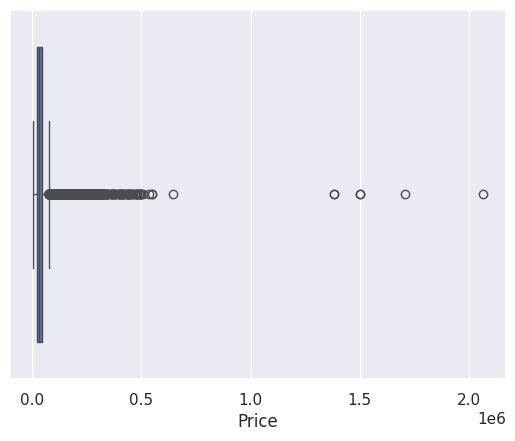

In [ ]:
# Detecting outliers

sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

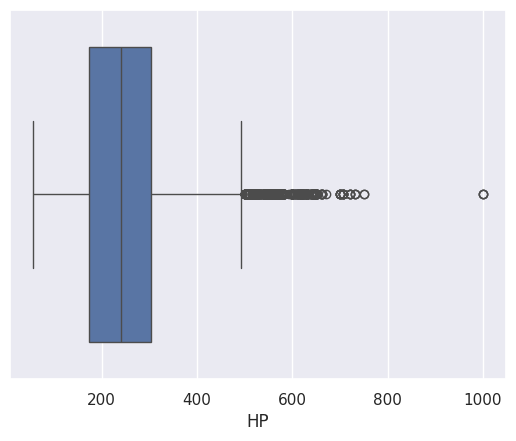

In [ ]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

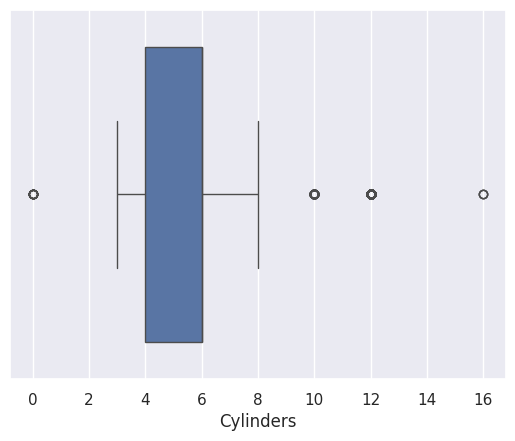

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [ ]:
# Calculate Q1 and Q3 only for numeric columns
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


```
IQR stands for Interquartile Range. It is a measure of statistical dispersion, describing the spread of the middle half of a dataset.

Here's a breakdown:

Quartiles: Imagine dividing your sorted data into four equal parts. The values that separate these parts are called quartiles.

Q1 (First Quartile): 25th percentile - 25% of the data falls below this value.
Q2 (Second Quartile): 50th percentile (also known as the median) - 50% of the data falls below this value.
Q3 (Third Quartile): 75th percentile - 75% of the data falls below this value.
IQR: The IQR is simply the difference between the third quartile (Q3) and the first quartile (Q1).

IQR = Q3 - Q1

Why is IQR useful?

Robust to outliers: Unlike range (which is sensitive to extreme values), IQR focuses on the central part of the data, making it less affected by outliers.

Identifying potential outliers: Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are often considered potential outliers.

Understanding data spread: A larger IQR indicates a wider spread of the middle half of the data, while a smaller IQR suggests a more concentrated dataset.
```

In [ ]:
# Calculate Q1 and Q3 only for numeric columns
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

In [ ]:


# Filter outliers only in numeric columns
numeric_df = df.select_dtypes(include=np.number)

print(numeric_df.shape)
df_filtered = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


print(df_filtered.shape)

# Update the original DataFrame with the filtered numeric columns
df[df_filtered.columns] = df_filtered

df.shape

(10827, 6)
(10816, 6)


(10827, 10)